In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
import lifelines as ll
from sksurv.ensemble import RandomSurvivalForest, GradientBoostingSurvivalAnalysis
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import brier_score, concordance_index_censored, cumulative_dynamic_auc
from sksurv.util import Surv
import seaborn as sns
from scipy.stats import norm, gamma, invgamma, mode
from numpy import matmul
from scipy import stats
from sklearn import metrics
from numpy.linalg import inv
from matplotlib.legend import Legend
from matplotlib.font_manager import get_font_names

import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
np.random.seed(45)

In [3]:
def get_ci(sample, alpha=0.95):
    '''
    sample: np.ndarray, (n,k)

    '''
    n = sample.shape[1]
    sample_mean = sample.mean(axis=1)
    sample_std = sample.std(axis=1)
    ci = alpha+(1-alpha)/2
    CI_lower = sample_mean - norm.ppf(ci)*(sample_std/(n**0.5))
    CI_upper = sample_mean + norm.ppf(ci)*(sample_std/(n**0.5))
    return sample_mean, CI_lower, CI_upper


In [4]:
DAT = []
for i in range(20):
    dat = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulation 3-{i+1}/simulation_3_{i+1}_figures.csv', index_col=0)
    dat = dat.replace(-np.inf, -2000)
    DAT.append(dat)
dat.head()

mu_theta    mu_psi  loglike_y_recording  log_z_y_trace  tau_y_mean_recording  n_cluster_recording
0  22.557473  7.611444              -2000.0       8.274612              0.214408                   21
1  16.244320  4.219371              -2000.0       8.245122              0.193721                   19
2  20.405869  4.320537              -2000.0       8.178919              0.200042                   18
3  14.016048  4.432713              -2000.0       8.120291              0.176995                   16
4  14.073947  3.617247              -2000.0       8.037543              0.165924                   15

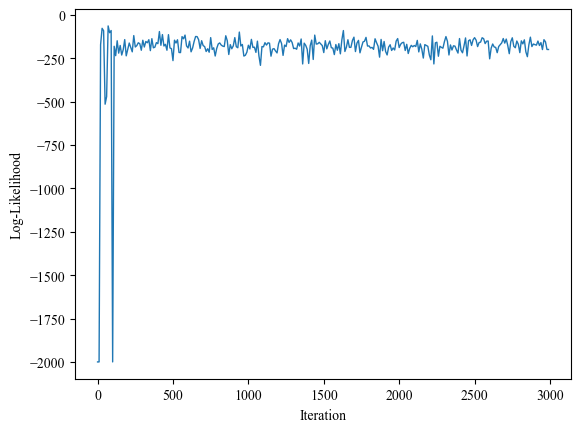

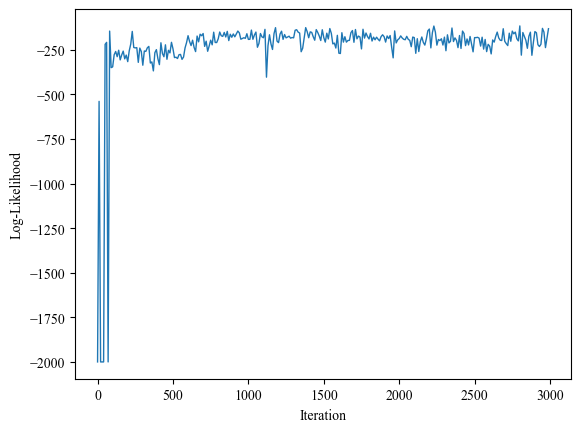

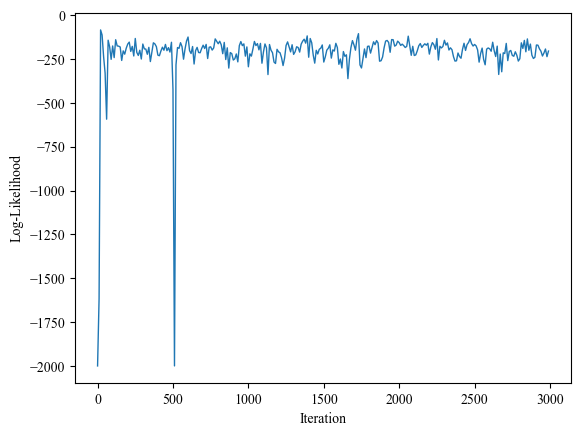

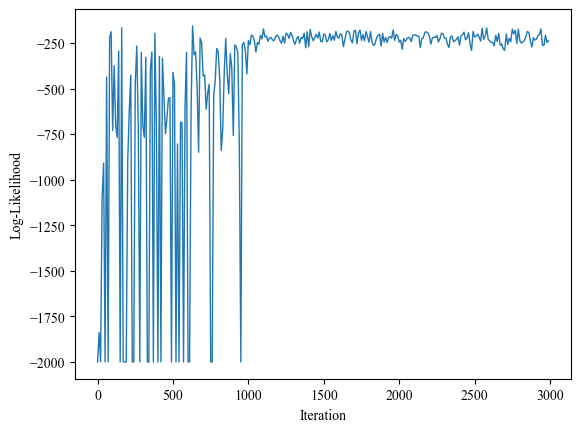

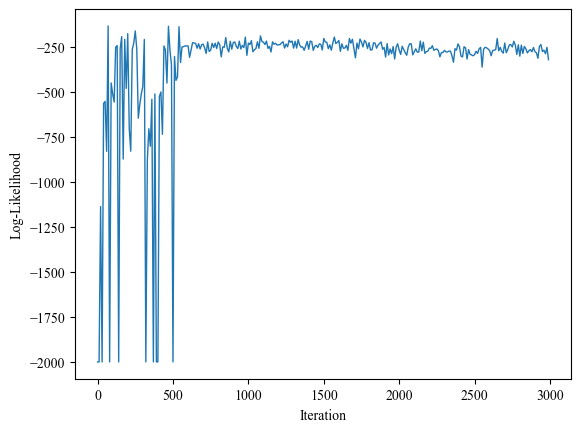

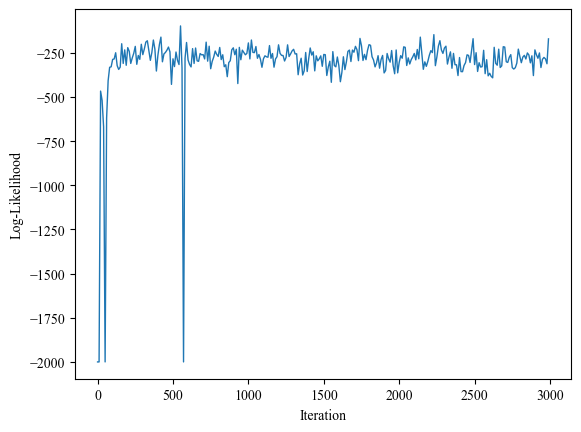

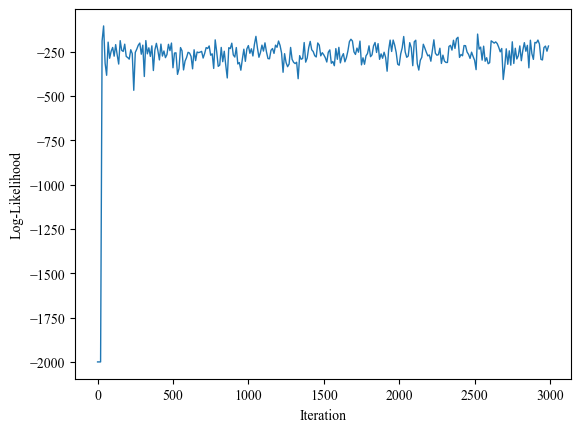

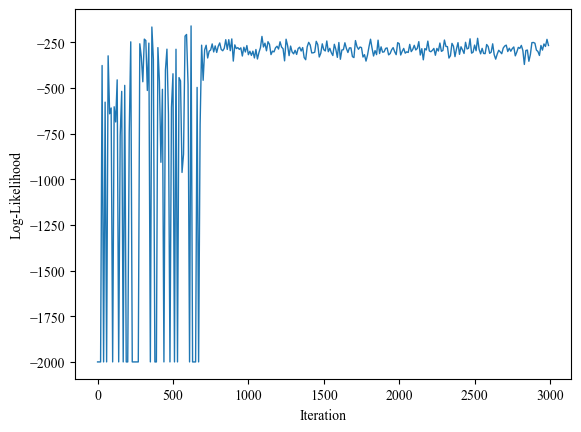

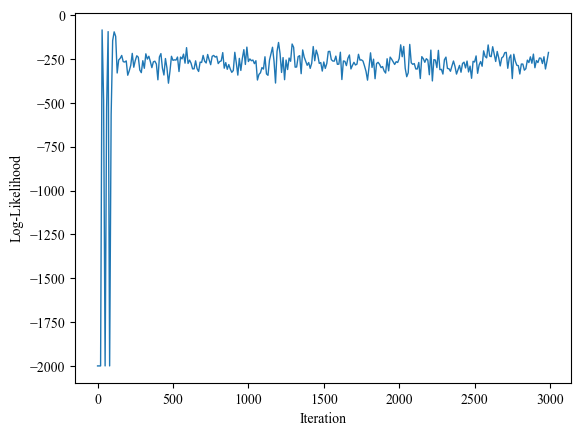

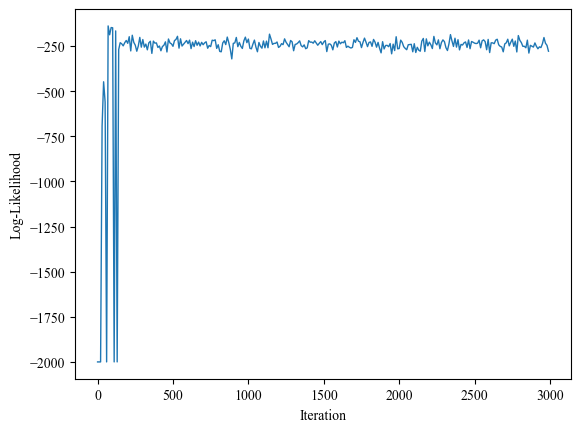

In [5]:
ind = [0,2,3,6,9,13,15,16,18,19]

for i in ind:
    fig, ax = plt.subplots()
    x = np.arange(0,DAT[i].shape[0],10)
    y = DAT[i].loc[x, 'loglike_y_recording']
    ax.plot(x, y, linewidth=1)
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.show()


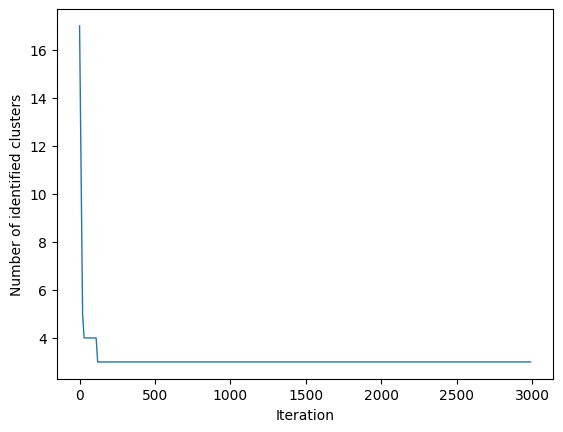

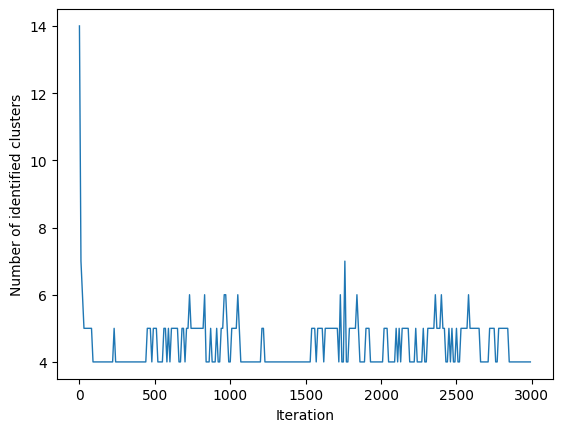

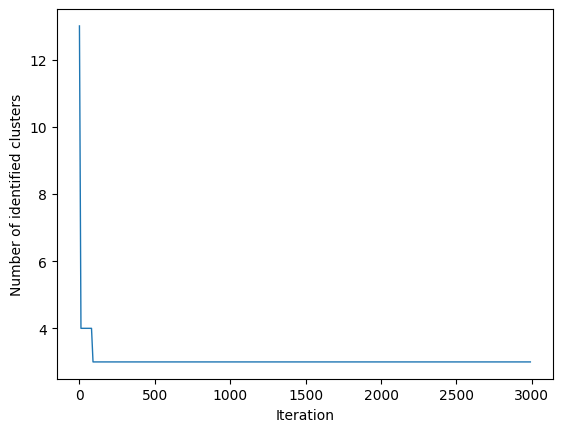

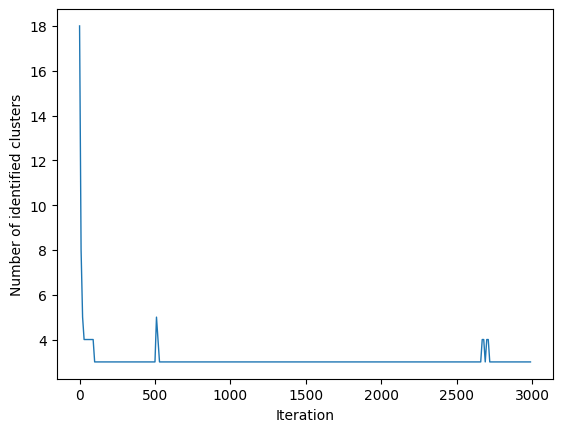

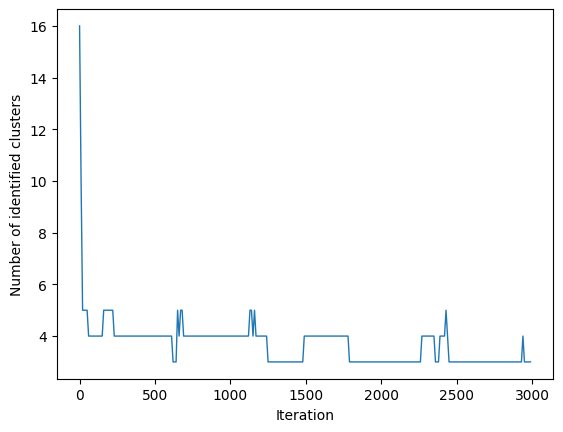

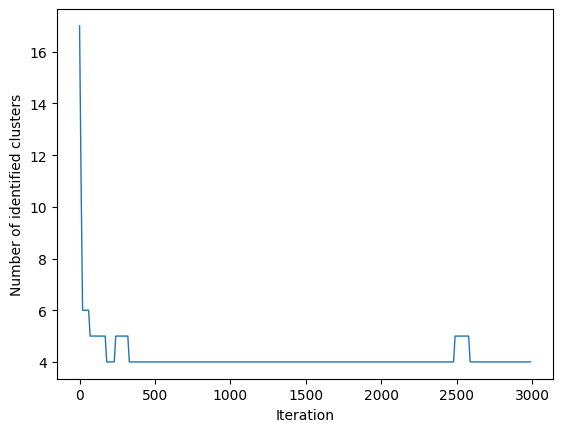

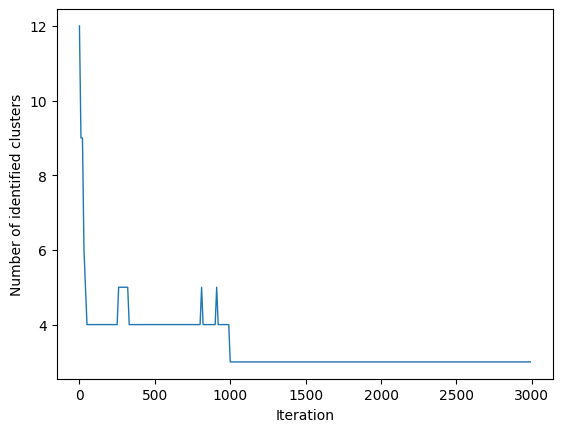

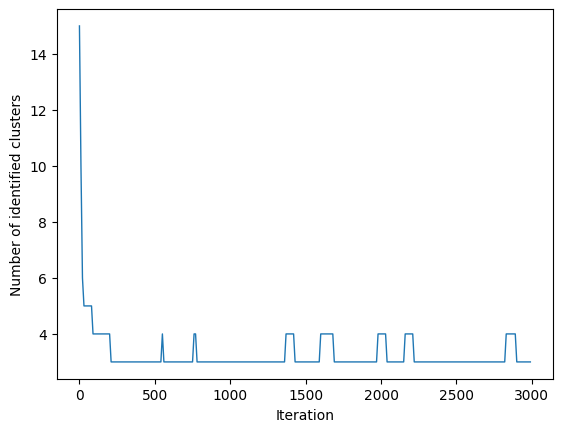

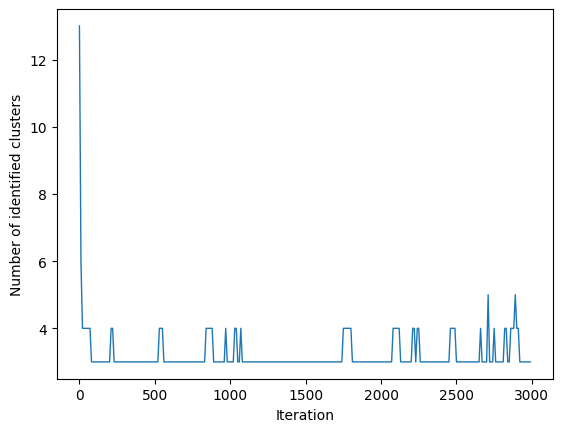

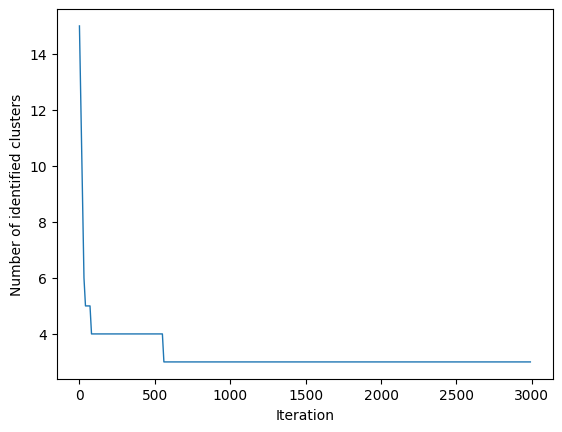

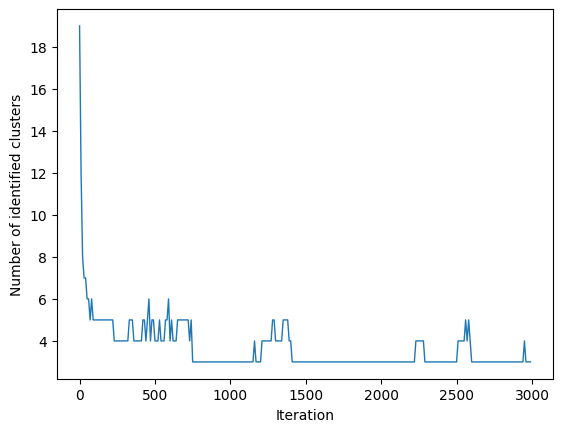

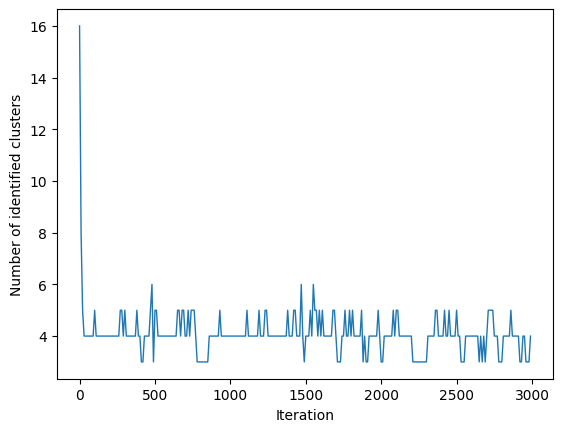

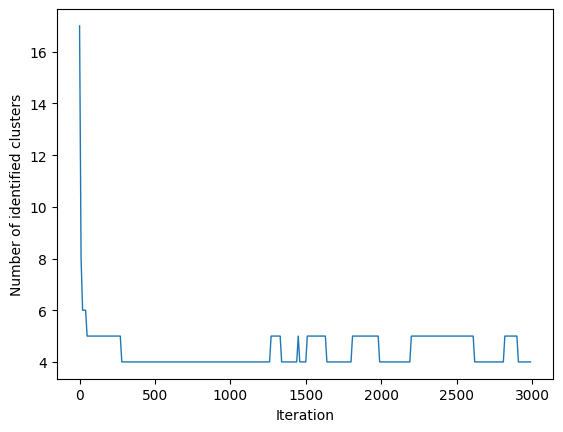

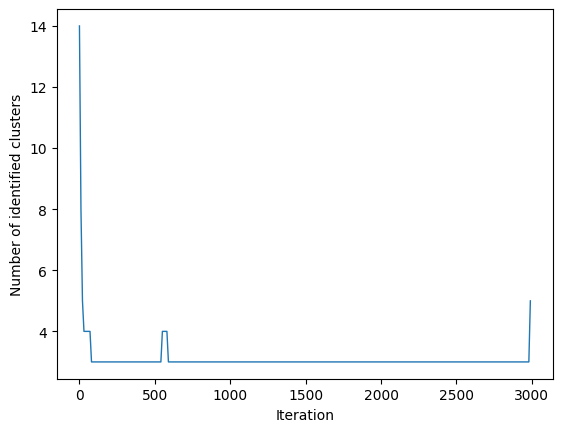

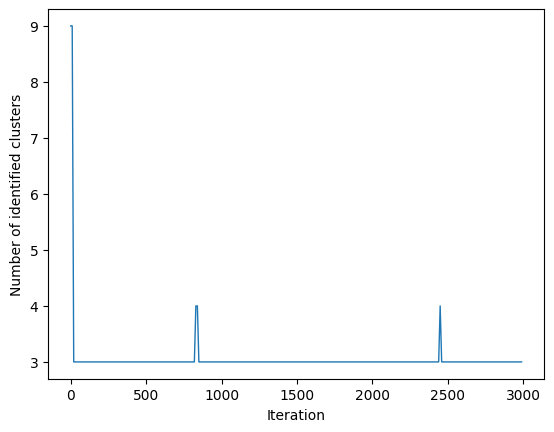

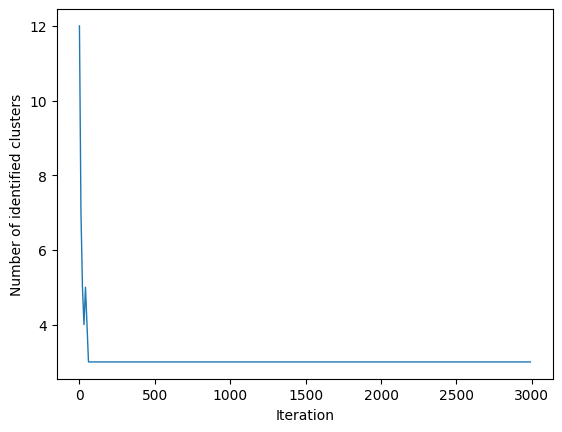

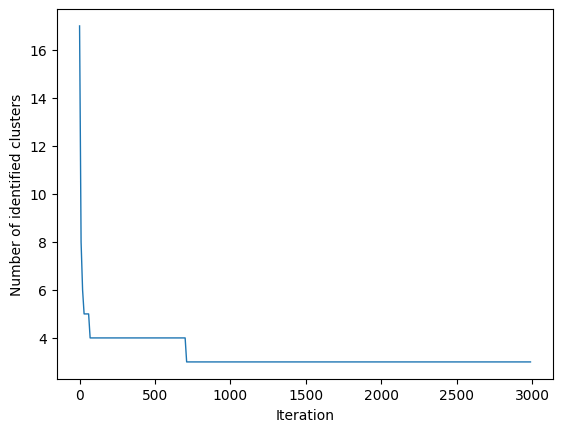

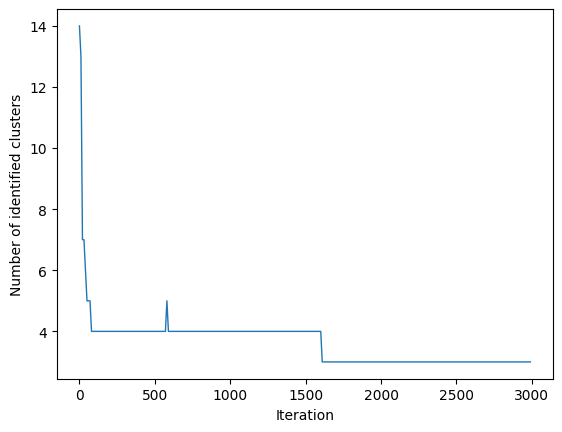

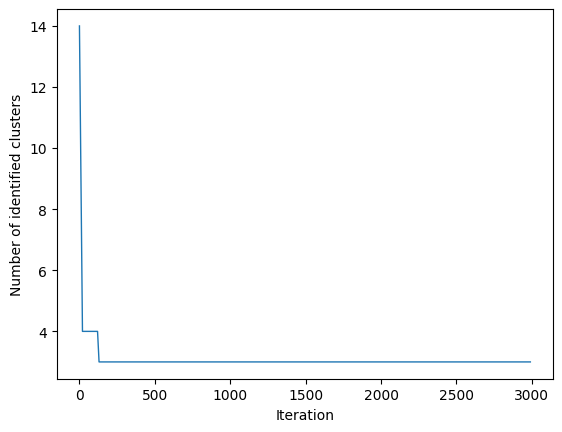

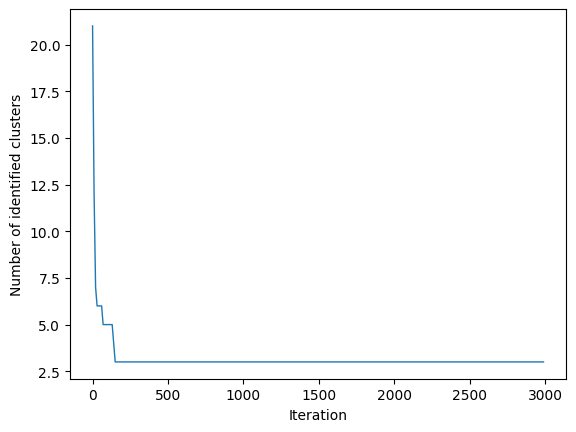

In [39]:

for i in range(20):
    fig, ax = plt.subplots()
    x = np.arange(0,DAT[i].shape[0], 10)
    y = DAT[i].loc[x, 'n_cluster_recording']
    ax.plot(x, y, linewidth=1)
    plt.xlabel('Iteration')
    plt.ylabel('Number of identified clusters')
    plt.show()

0


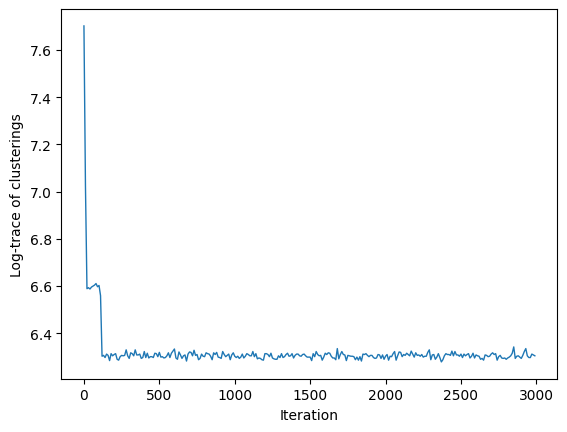

1


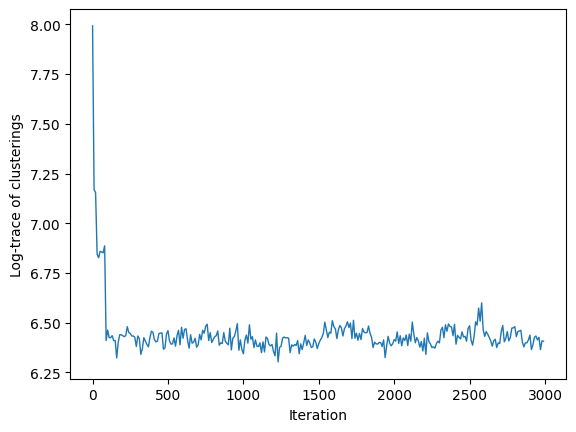

2


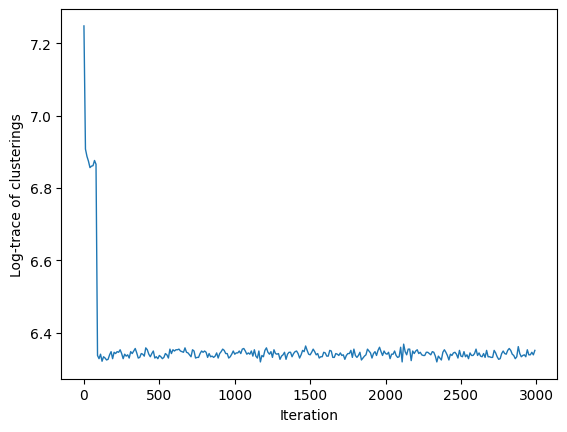

3


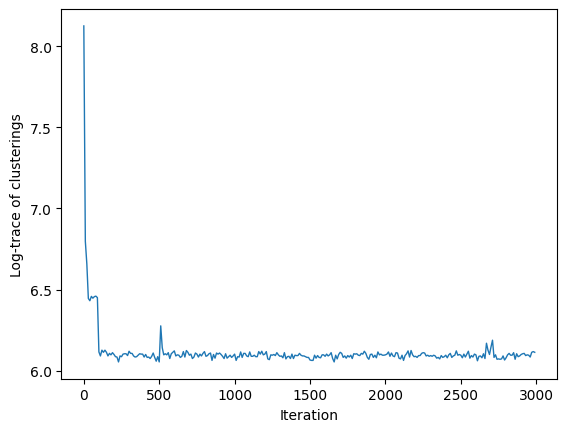

4


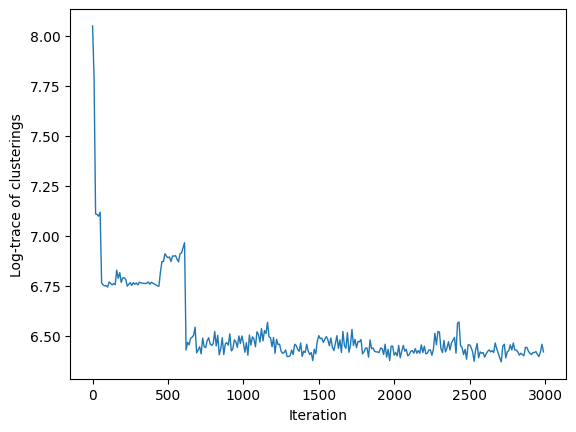

5


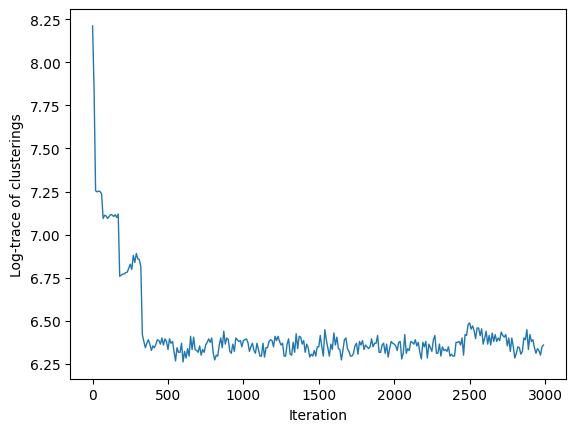

6


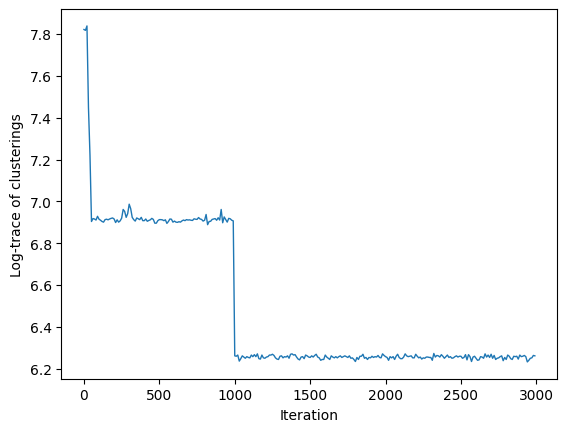

7


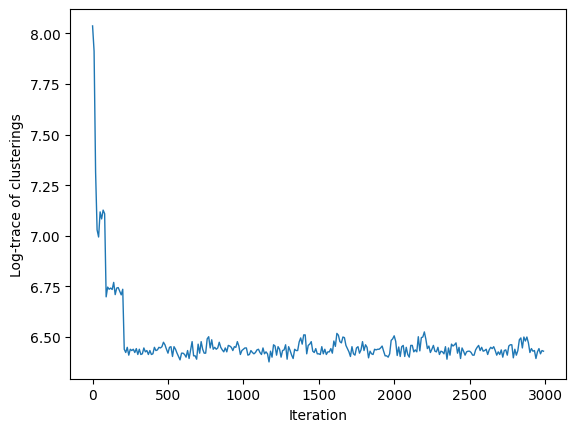

8


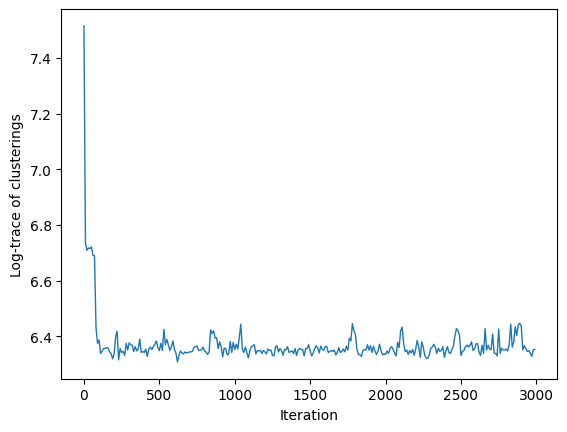

9


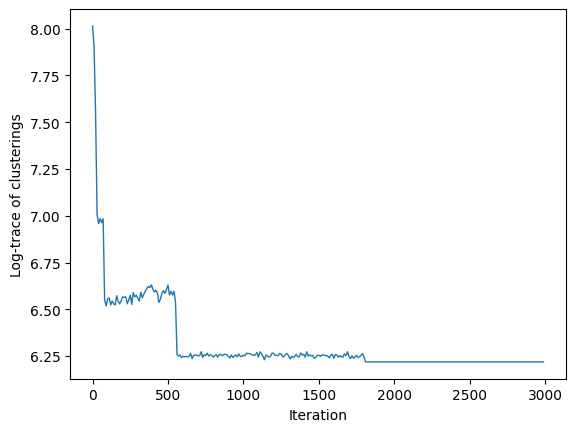

10


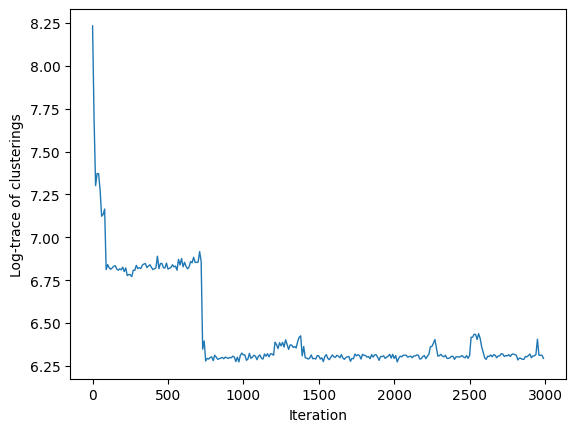

11


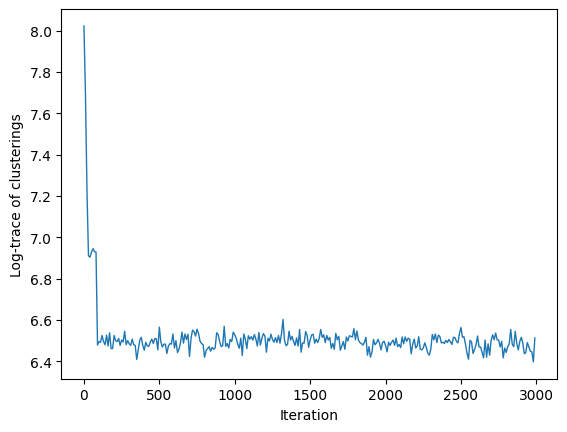

12


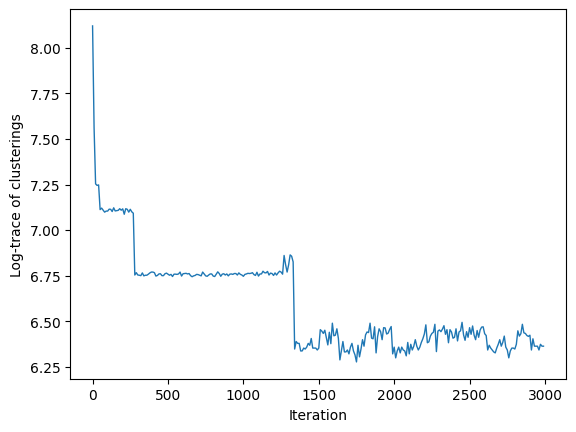

13


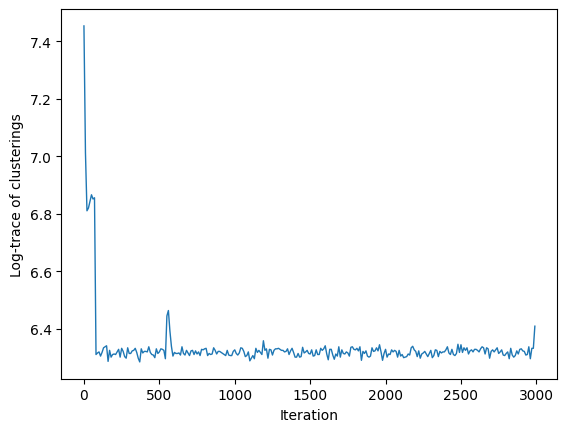

14


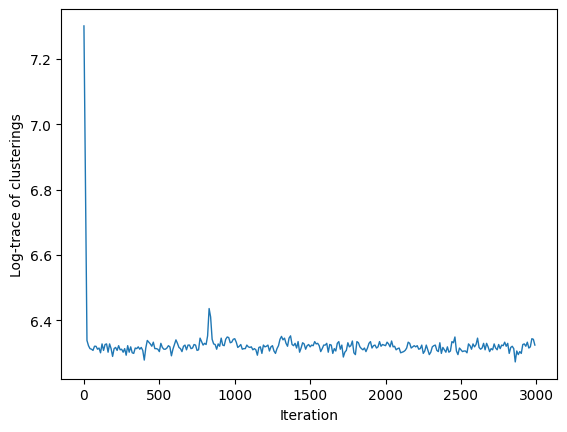

15


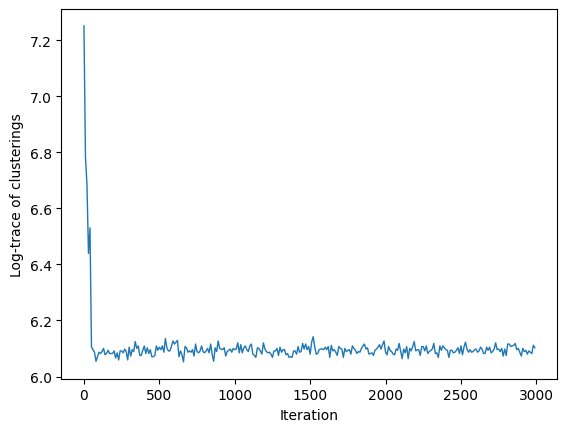

16


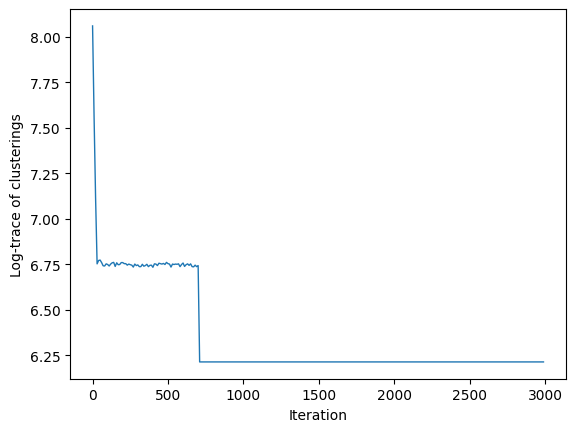

17


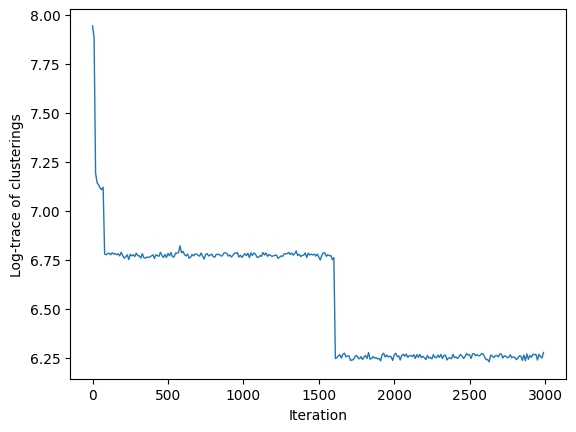

18


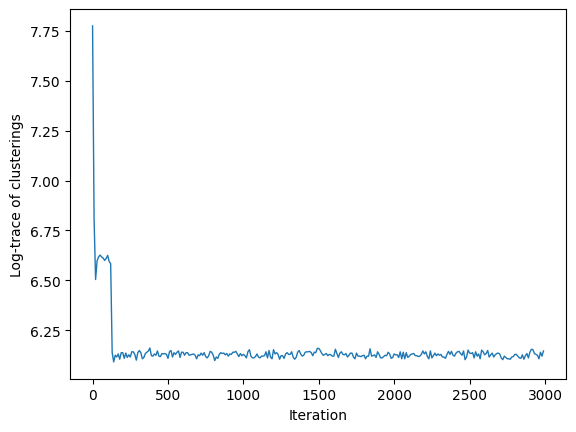

19


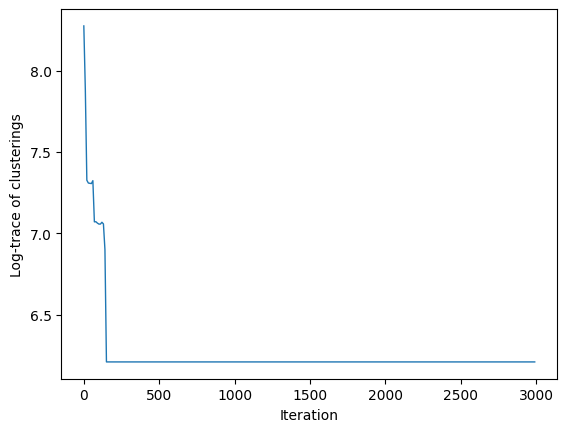

In [40]:
for i in range(20):
    print(i)
    fig, ax = plt.subplots()
    x = np.arange(0,DAT[i].shape[0],10)
    y = DAT[i].loc[x, 'log_z_y_trace']
    ax.plot(x, y, linewidth=1)
    plt.xlabel('Iteration')
    plt.ylabel('Log-trace of clusterings')
    plt.show()

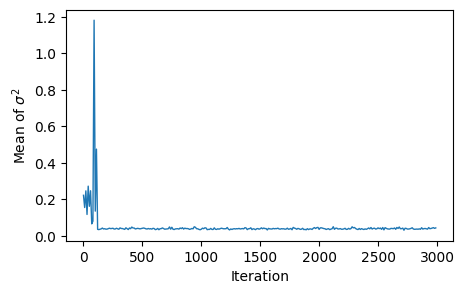

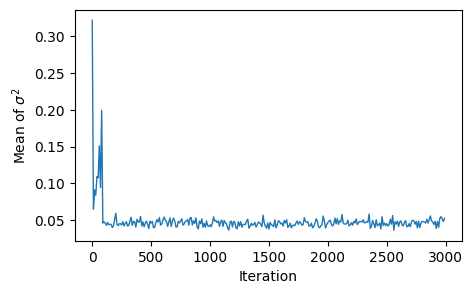

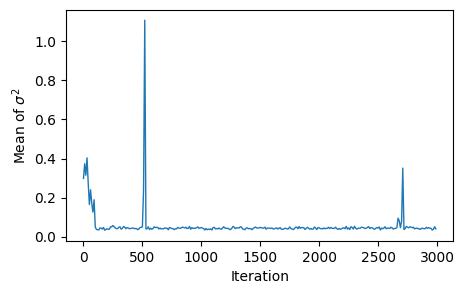

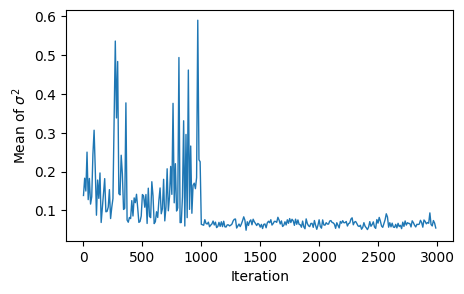

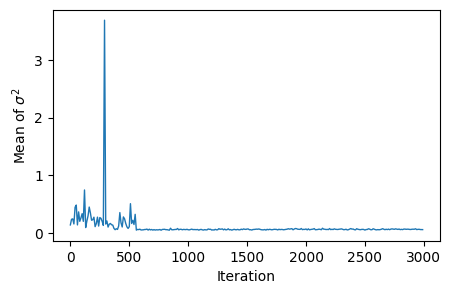

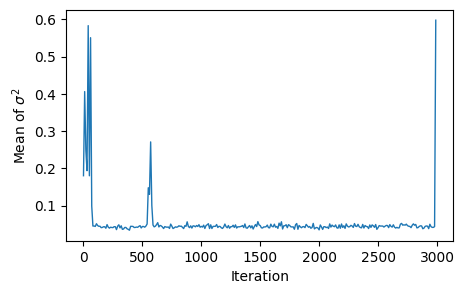

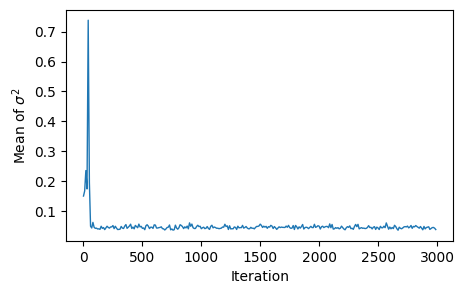

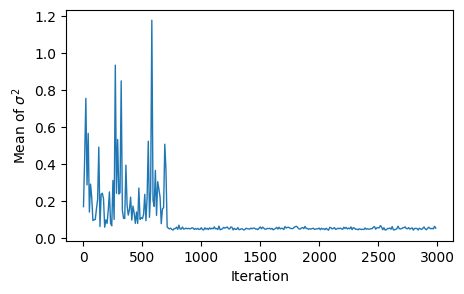

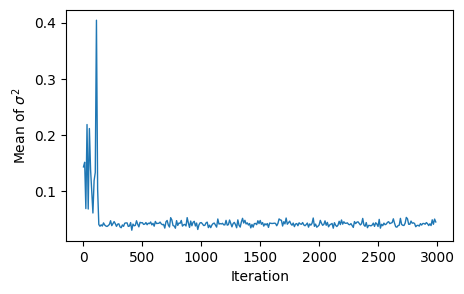

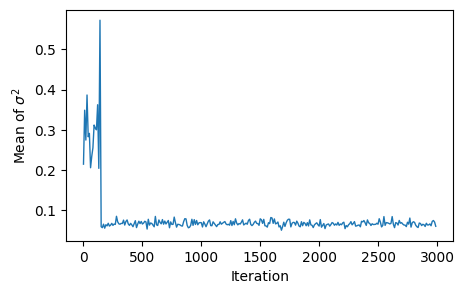

In [41]:
for i in ind:
    fig, ax = plt.subplots(figsize=(5,3))
    x = np.arange(0,DAT[i].shape[0],10)
    y = DAT[i].loc[x, 'tau_y_mean_recording']
    ax.plot(x, y, linewidth=1)
    plt.xlabel('Iteration')
    plt.ylabel('Mean of $\sigma^2$')
    plt.show()

In [ ]:
mu_theta = []
mu_psi = []
loglike = []
log_z_y = []
tau_y_mean = []
n_cluster = []

for i in ind:
    dat = DAT[i]
    mu_theta.append(dat['mu_theta'].values)
    mu_psi.append(dat['mu_psi'].values)
    loglike.append(dat['loglike_y_recording'].values)
    log_z_y.append(dat['log_z_y_trace'].values)
    tau_y_mean.append(dat['tau_y_mean_recording'].values)
    n_cluster.append(dat['n_cluster_recording'].values)
mu_theta = np.array(mu_theta).T
mu_psi = np.array(mu_psi).T
loglike = np.array(loglike).T
log_z_y = np.array(log_z_y).T
tau_y_mean = np.array(tau_y_mean).T
n_cluster = np.array(n_cluster).T


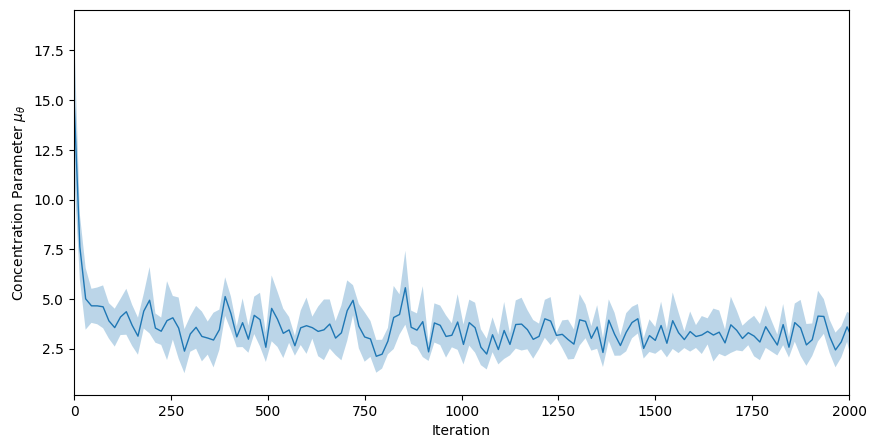

In [178]:
mean_mu_theta, CI_mu_theta_lower, CI_mu_theta_upper = get_ci(mu_theta)
x = np.arange(0, 3000, 15)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x,mean_mu_theta[x], linewidth=1)
ax.fill_between(x, CI_mu_theta_lower[x], CI_mu_theta_upper[x], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel(r'Concentration Parameter $\mu_{\theta}$')
plt.xlim(0,2000)
plt.show()


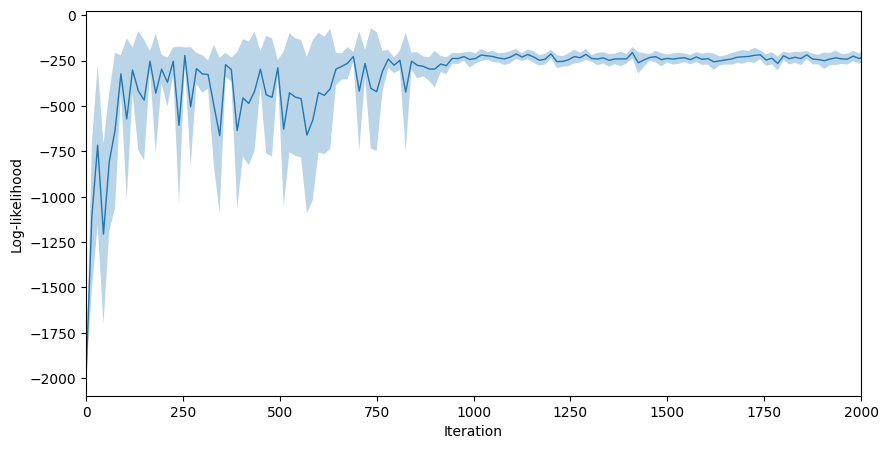

In [179]:
mean_loglike, CI_loglike_lower, CI_loglike_upper = get_ci(loglike)
x = np.arange(0, 3000,15)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x,mean_loglike[x], linewidth=1)
ax.fill_between(x, CI_loglike_lower[x], CI_loglike_upper[x], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.xlim(0,2000)
plt.show()


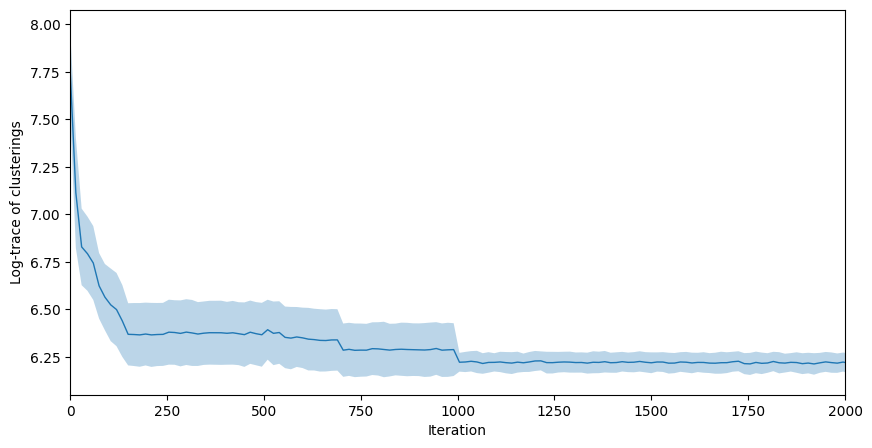

In [180]:
mean_log_z_y, CI_log_z_y_lower, CI_log_z_y_upper = get_ci(log_z_y)
x = np.arange(0, 3000, 15)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x,mean_log_z_y[x], linewidth=1)
ax.fill_between(x, CI_log_z_y_lower[x], CI_log_z_y_upper[x], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Log-trace of clusterings')
plt.xlim(0,2000)
plt.show()

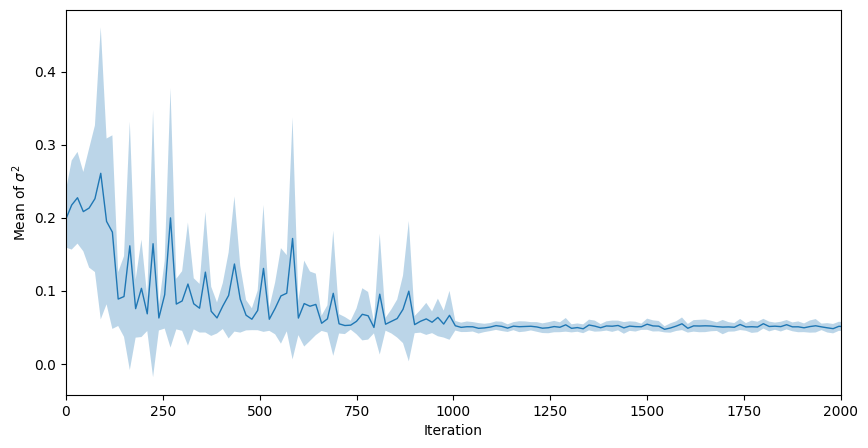

In [181]:
mean_tau_y_mean, CI_tau_y_mean_lower, CI_tau_y_mean_upper = get_ci(tau_y_mean)
x = np.arange(0, 3000, 15)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x,mean_tau_y_mean[x], linewidth=1)
ax.fill_between(x, CI_tau_y_mean_lower[x], CI_tau_y_mean_upper[x], alpha=0.3)
plt.xlabel('Iteration', fontsize=10)
plt.xlim(0,2000)
plt.ylabel('Mean of $\sigma^2$', fontsize=10)
plt.show()

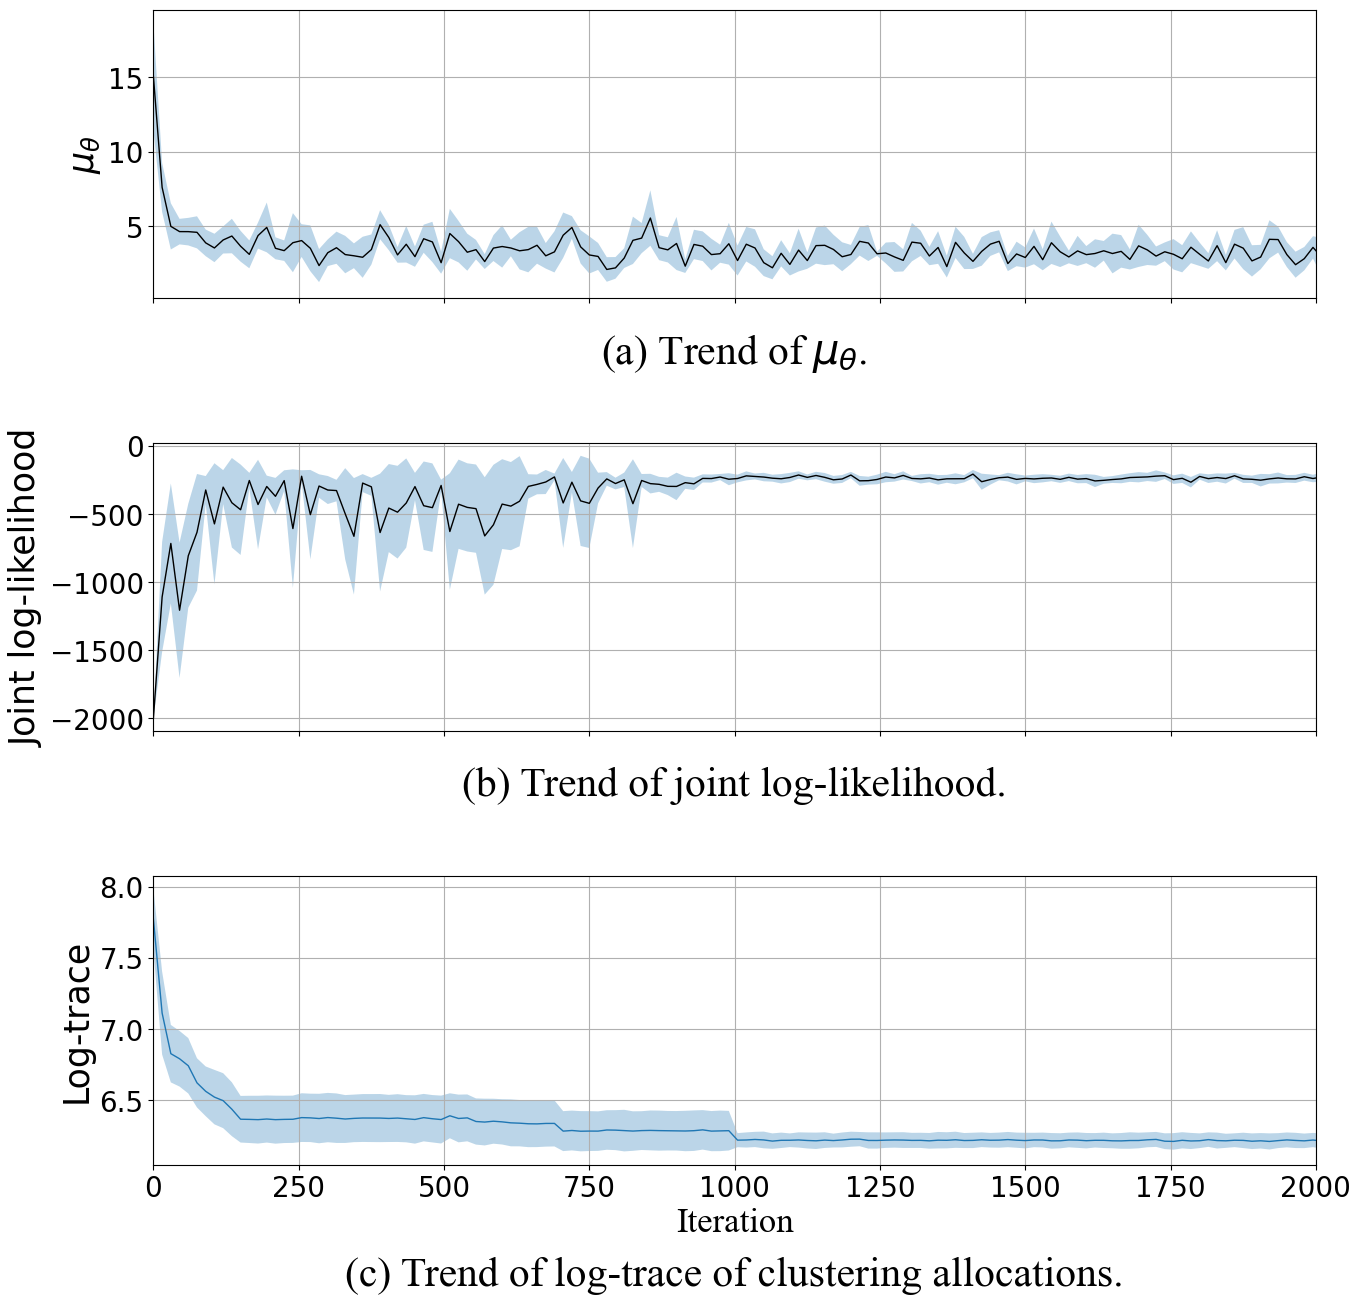

In [359]:
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }

fig, ax = plt.subplots(3,1, sharex=True, sharey=False, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)



mean_mu_theta, CI_mu_theta_lower, CI_mu_theta_upper = get_ci(mu_theta)
x = np.arange(0, 3000, 15)


ax[0].plot(x, mean_mu_theta[x], 'k-', lw=1)
ax[0].fill_between(x, CI_mu_theta_lower[x], CI_mu_theta_upper[x], alpha=0.3)
ax[0].set_xlim([0,2000])
ax[0].set_ylabel(r'$\mu_{\theta}$', fontsize=25)
ax[0].tick_params(axis="x", labelsize=20)
ax[0].tick_params(axis="y", labelsize=20)
ax[0].set_title(r'(a) Trend of $\mu_{\theta}$.', y=0, pad=-25, verticalalignment="top", fontdict=font)
# ax[0].set_title(r'(a) Density of $\sigma^2$.', fontdict=font)
ax[0].grid()








mean_loglike, CI_loglike_lower, CI_loglike_upper = get_ci(loglike)
x = np.arange(0, 3000,15)


ax[1].plot(x, mean_loglike[x], 'k-', lw=1)
ax[1].fill_between(x, CI_loglike_lower[x], CI_loglike_upper[x], alpha=0.3)
ax[1].set_ylabel('Joint log-likelihood', fontsize=25)
ax[1].set_xlim([0,2000])
ax[1].tick_params(axis="x", labelsize=20)
ax[1].tick_params(axis="y", labelsize=20)
ax[1].set_title(r'(b) Trend of joint log-likelihood.', y=0, pad=-25, verticalalignment="top", fontdict=font)
# ax[1].set_title(r'(b) Density of $\mu_{\theta}$.', fontdict=font)
ax[1].grid()








mean_log_z_y, CI_log_z_y_lower, CI_log_z_y_upper = get_ci(log_z_y)
x = np.arange(0, 3000, 15)

ax[2].plot(x,mean_log_z_y[x], linewidth=1)
ax[2].fill_between(x, CI_log_z_y_lower[x], CI_log_z_y_upper[x], alpha=0.3)
ax[2].set_xlabel('Iteration', fontsize=25, fontdict=font)
ax[2].set_ylabel('Log-trace', fontsize=25)
ax[2].tick_params(axis="x", labelsize=20)
ax[2].tick_params(axis="y", labelsize=20)
ax[2].set_xlim([0,2000])
ax[2].set_title(r'(c) Trend of log-trace of clustering allocations.', y=-0.2, pad=-25, verticalalignment="top", fontdict=font)
# ax[2].set_title(r'(b) Density of simulated data.', fontdict=font)
ax[2].grid()





plt.show()

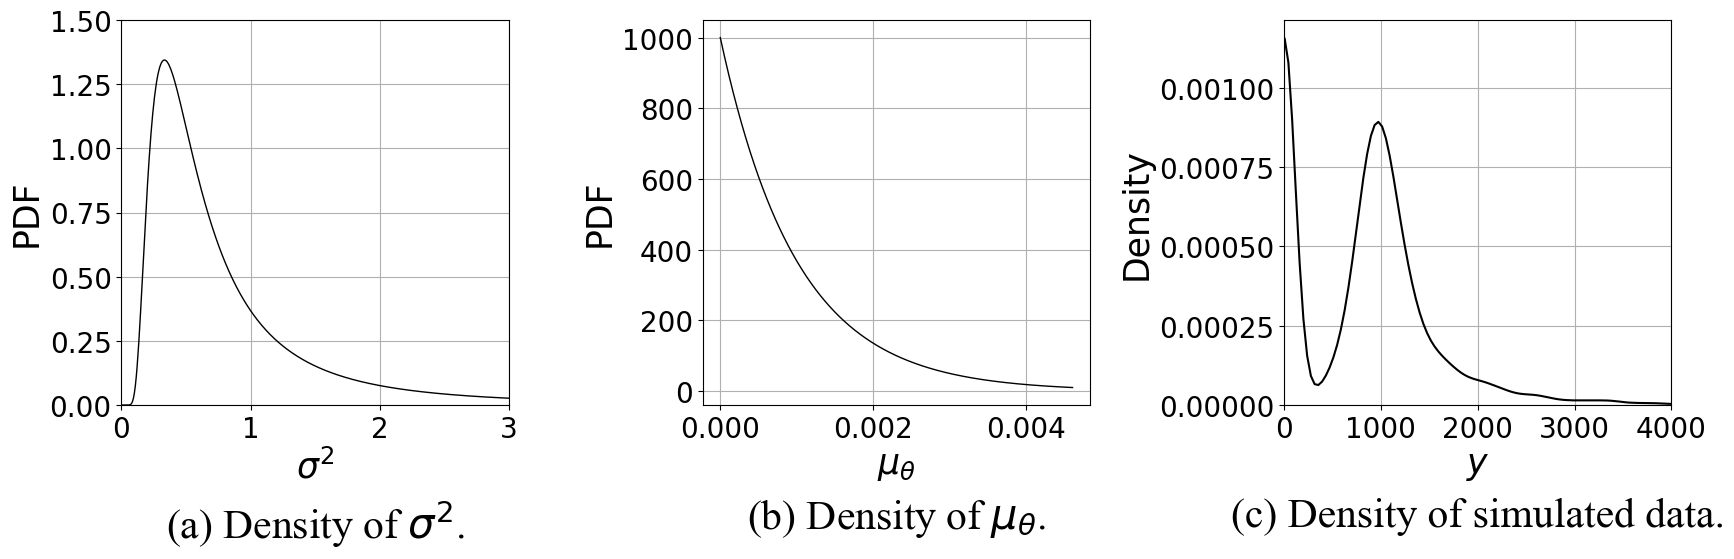

In [340]:
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }

rv = invgamma(a=2, scale=1)
x = np.linspace(0,rv.ppf(0.99), 1000)
pdf = rv.pdf(x)
fig, ax = plt.subplots(1,3, sharex=False, sharey=False, figsize=(20,5))
fig.subplots_adjust(wspace=0.5)

ax[0].plot(x, pdf, 'k-', lw=1, label='frozen pdf')
ax[0].set_xlabel('$\sigma^2$', fontsize=25)
ax[0].set_xlim([0,3])
ax[0].set_ylabel('PDF', fontsize=25)
ax[0].set_ylim([0,1.5])
ax[0].tick_params(axis="x", labelsize=20)
ax[0].tick_params(axis="y", labelsize=20)
ax[0].set_title(r'(a) Density of $\sigma^2$.', y=-0.15, pad=-25, verticalalignment="top", fontdict=font)
# ax[0].set_title(r'(a) Density of $\sigma^2$.', fontdict=font)
ax[0].grid()

rv = gamma(a=1, scale=0.001)
x = np.linspace(0,rv.ppf(0.99), 1000)
pdf = rv.pdf(x)


ax[1].plot(x, pdf, 'k-', lw=1, label='frozen pdf')
ax[1].set_xlabel(r'$\mu_{\theta}$', fontsize=25)
ax[1].set_ylabel('PDF', fontsize=25)
ax[1].tick_params(axis="x", labelsize=20)
ax[1].tick_params(axis="y", labelsize=20)
ax[1].set_title(r'(b) Density of $\mu_{\theta}$.', y=-0.15, pad=-25, verticalalignment="top", fontdict=font)
# ax[1].set_title(r'(b) Density of $\mu_{\theta}$.', fontdict=font)
ax[1].grid()

full_dat = pd.read_csv('C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulated Full Data 3.csv', index_col=0)
y = np.exp(full_dat['Y'])

sns.kdeplot(ax=ax[2], data=y,color='black')
ax[2].set_xlabel('$y$', fontsize=25)
ax[2].set_ylabel('Density', fontsize=25)
ax[2].tick_params(axis="x", labelsize=20)
ax[2].tick_params(axis="y", labelsize=20)
ax[2].set_xlim([0,4000])
ax[2].set_title(r'(c) Density of simulated data.', y=-0.15, pad=-25, verticalalignment="top", fontdict=font)
# ax[2].set_title(r'(b) Density of simulated data.', fontdict=font)
ax[2].grid()

plt.show()

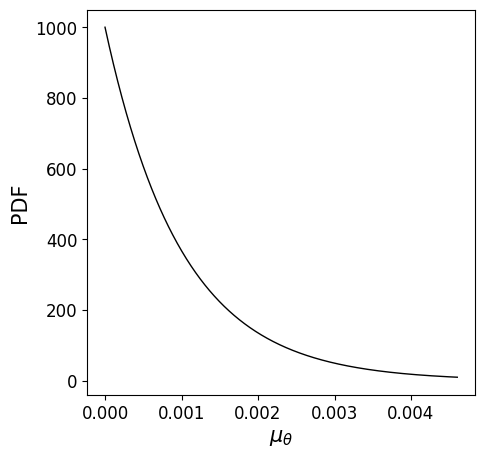

In [163]:
rv = gamma(a=1, scale=0.001)
x = np.linspace(0,rv.ppf(0.99), 1000)
pdf = rv.pdf(x)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, pdf, 'k-', lw=1, label='frozen pdf')
plt.xlabel(r'$\mu_{\theta}$', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.locator_params(axis='x', nbins=6)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

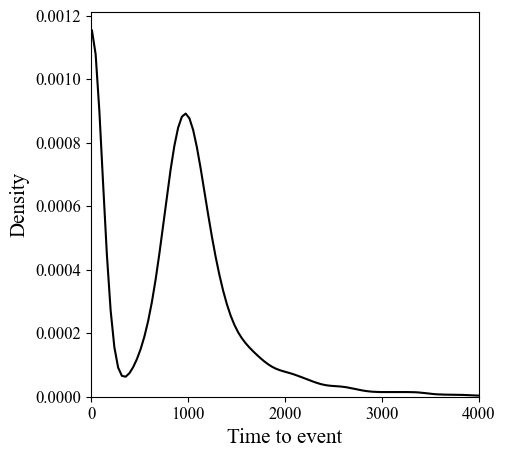

In [6]:
full_dat = pd.read_csv('C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulated Full Data 3.csv', index_col=0)
y = np.exp(full_dat['Y'])
fig, ax = plt.subplots(figsize=(5,5))
sns.kdeplot(ax=ax, data=y,color='black')
plt.xlabel('Time to event', fontsize=15)
plt.xlim(0,4000)
plt.ylabel('Density', fontsize=15)
plt.locator_params(axis='x', nbins=5)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


In [7]:
def Filter(string, substr):
    return [str for str in string if
             any(sub in str for sub in substr)]

def vectorized_gaussian_logpdf(X, means, covariances):
    # """
    # Compute log N(x_i; mu_i, sigma_i) for each x_i, mu_i, sigma_i
    # Args:
    #     X : shape (d)
    #         Data points
    #     means : shape (self.N, d)
    #         Mean vectors
    #     covariances : shape (self.N, d)
    #         Diagonal covariance matrices
    # Returns:
    #     logpdfs : shape (n,)
    #         Log probabilities
    # """
        d = X.shape[0]
        constant = d * np.log(2 * np.pi)
        log_determinants = np.log(np.prod(covariances, axis=1))
        deviations = X - means
        inverses = 1 / covariances
        return -0.5 * (constant + log_determinants + np.sum(deviations * inverses * deviations, axis=1))

def vectorized_norm_loglikelihood(X, means, covariances, delta):
    #  '''
    #  Compute log Norm(X_i, mu_i, sigma_i) for each x_i, mu_i, sigma_i
    #  Args:
    #      X: shape (n,)
    #      means: shape (n,d)
    #      covariances (d,)
    #  Returns: logsf: shape (d,)
    #  '''
    loglikelihood = [delta*np.log(stats.norm.pdf(x = X, loc=means[:, i], scale=np.sqrt(covariances[i]))) + (1-delta)*np.log(stats.norm.sf(x = X, loc=means[:, i], scale=np.sqrt(covariances[i]))) for i in range(means.shape[1])]
    loglikelihood = np.array(loglikelihood).sum(axis=1)
    return loglikelihood

In [8]:
## True Survival prob:
True_beta = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulation Parameters 3.csv', index_col=0)
DDD = []
for i in range(20):
    dat = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulated data 3_{i+1}.csv', index_col=0)
    DDD.append(dat)
FULL = pd.concat(DDD, ignore_index=True)
Y = FULL['Y'].values
True_mean_y = FULL['y_mu'].values
True_sigma_y = np.sqrt(FULL['y_sigma'])
True_z_y = FULL['z_y']
True_surv = norm.sf(Y, scale=True_sigma_y, loc=True_mean_y)
Delta = FULL['c_y']



In [9]:
IND_train = [[4,5,6,7,8,9,10,11,12,13,14,15,16, 17,18,19], 
             [0,1,2,3,8,9,10,11,12,13,14,15,16, 17,18,19], 
             [0,1,2,3,4,5,6,7,12,13,14,15,16, 17,18,19], 
             [0,1,2,3,4,5,6,7,8,9,10,11,16, 17,18,19],
             [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
IND_test = [[0,1,2,3],
            [4,5,6,7],
            [8,9,10,11],
            [12,13,14,15],
            [16, 17,18,19]]

In [10]:

SURV_TEST=[]
for st in range(5):
    Z_Y = []
    Z_X = []
    BETA_Y = []
    TAU_Y = []
    BETA_X = []
    TAU_X = []
    data_train = []
    ind_train = IND_train[st]
    ind_test = IND_test[st]
    for i in ind_train:
        dat = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulated data 3_{i+1}.csv', index_col=0)
        z_y = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulation 3-{i+1}/simulation_3_{i+1}_Z_Y_records.csv', index_col=0)
        z_x = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulation 3-{i+1}/simulation_3_{i+1}_Z_X_records.csv', index_col=0)
        beta_y = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulation 3-{i+1}/simulation_3_{i+1}_BETA_Y_records.csv', index_col=0)
        tau_y = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulation 3-{i+1}/simulation_3_{i+1}_TAU_Y_records.csv', index_col=0)
        beta_x = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulation 3-{i+1}/simulation_3_{i+1}_BETA_X_records.csv', index_col=0)
        tau_x = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulation 3-{i+1}/simulation_3_{i+1}_TAU_X_records.csv', index_col=0)
        Z_Y.append(z_y)
        Z_X.append(z_x)
        BETA_Y.append(beta_y)
        TAU_Y.append(tau_y)
        BETA_X.append(beta_x)
        TAU_X.append(tau_x)
        data_train.append(dat)
    data_test=[]
    for i in ind_test:
        dat = pd.read_csv(f'C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 3 - small std - 2000/Simulated data 3_{i+1}.csv', index_col=0)
        data_test.append(dat)
    Training = pd.concat(data_train, ignore_index=True)
    true_train_z_y = Training['z_y']
    true_train_y = Training['Y']
    Testing = pd.concat(data_test, ignore_index=True)
    true_test_z_y = Testing['z_y']
    true_test_y = Testing['Y']
    delta_test = Testing['c_y']
    Testing1 = Testing.drop(columns=['z_x', 'z_y', 'c_y', 'y_mu', 'y_sigma', 'Y'])
    X_name = Testing1.columns
    Agg_z_y = [Z_Y[i].copy() for i in range(16)]
    Agg_z_x = [Z_X[i].copy() for i in range(16)]

    n_subsets_cluster_y = [[Z_Y[j].iloc[:,i].nunique() for j in range(16)] for i in range(50)]
    # print(n_subsets_cluster_y)
    n_subsets_cluster_x = [[Z_X[j].iloc[:,i].nunique() for j in range(16)] for i in range(50)]
    random.seed(10)
    reference_subset = random.choices(range(16),k=50)
    # print(reference_subset)
    for t in range(50):
        i = reference_subset[t]
        target_z_y = Z_Y[i].iloc[:,t]
        n_N_y = target_z_y.value_counts(sort=False).sort_index()
        target_z_x = Z_X[i].iloc[:,t]
        beta_y = BETA_Y[i]
        name_beta_y = Filter(beta_y.columns, [f'in_{t+1}_iteration'])
        target_beta_y = beta_y[name_beta_y].values
        tau_y = TAU_Y[i]
        name_tau_y = Filter(tau_y.columns, [f'in_{t+1}_iteration'])
        target_tau_y = tau_y[name_tau_y].values
        beta_x = BETA_X[i]
        name_beta_x = Filter(beta_x.columns, [f'in_{t+1}_iteration'])
        target_beta_x = beta_x[name_beta_x].values
        tau_x = TAU_X[i]
        name_tau_x = Filter(tau_x.columns, [f'in_{t+1}_iteration'])
        target_tau_x = tau_x[name_tau_x].values
        for k in range(16):
            n_n = n_subsets_cluster_y[t][k]
            # print(f'the {k+1}th subset in the {t+1}th iteration')
            if k != i:
                DAT = data_train[k]
                for s in range(n_n):
                    ddd = DAT[Z_Y[k][f'z_y_{t+1}_iteration'] == s]
                    # print(ddd.shape)
                    X = ddd[X_name].values
                    delta = ddd['c_y'].values
                    y = ddd['Y'].values
                    # print(y.shape)
                    mean_y = matmul(X, target_beta_y)
                    # print(mean_y.shape)
                    likelihood_y = vectorized_norm_loglikelihood(y, mean_y, target_tau_y[0], delta)
                    # print(likelihood_y)
                    likelihood_y = np.nan_to_num(likelihood_y, nan=-np.inf)
                    likelihood_x = [np.exp(vectorized_gaussian_logpdf(X[t], target_beta_x.T, target_tau_x.T)) for t in range(X.shape[0])]
                    likelihood_x = np.array(likelihood_x).sum(axis=0)
                    true_z_y = np.argmax(likelihood_y)
                    # print(true_z_y)
                    true_z_x = np.argmax(likelihood_x)
                    Agg_z_y[k].loc[ddd.index, f'z_y_{t+1}_iteration'] = true_z_y
                    Agg_z_x[k].loc[ddd.index, f'z_x_{t+1}_iteration'] = true_z_x

    Agg_z_y_test = pd.DataFrame(np.ones((Testing1.shape[0], 50)), columns=Z_Y[0].columns)
    Agg_z_x_test = pd.DataFrame(np.ones((Testing1.shape[0], 50)), columns=Z_X[0].columns)
    SF_TEST = []
    for t in range(50):
        i = reference_subset[t]
        n_n = n_subsets_cluster_y[t][i]
        target_z_y = Z_Y[i].iloc[:,t]
        n_N_y = target_z_y.value_counts(sort=False).sort_index()
        target_z_x = Z_X[i].iloc[:,t]
        beta_y = BETA_Y[i]
        name_beta_y = Filter(beta_y.columns, [f'in_{t+1}_iteration'])
        target_beta_y = beta_y[name_beta_y].values
        target_beta_y = target_beta_y[:,:n_n]
        tau_y = TAU_Y[i]
        name_tau_y = Filter(tau_y.columns, [f'in_{t+1}_iteration'])
        target_tau_y = tau_y[name_tau_y].values
        target_tau_y = target_tau_y[:,:n_n]
        beta_x = BETA_X[i]
        name_beta_x = Filter(beta_x.columns, [f'in_{t+1}_iteration'])
        target_beta_x = beta_x[name_beta_x].values
        tau_x = TAU_X[i]
        name_tau_x = Filter(tau_x.columns, [f'in_{t+1}_iteration'])
        target_tau_x = tau_x[name_tau_x].values
        n_N_x = []
        for s in range(n_subsets_cluster_x[t][i]):
            group = target_z_y[target_z_x == s]
            n_m = np.zeros(n_N_y.shape[0])
            n_m_effective = group.value_counts(sort=False).sort_index()
            n_m[n_m_effective.index] = n_m_effective
            n_N_x.append(n_m)
        n_N_x = np.array(n_N_x).T
        SF_test = []
        for j in range(Testing1.shape[0]):
            y = true_test_y[j]
            x = Testing1.loc[j, ].values
            delta = delta_test[j]
            mean_y = matmul(x.reshape(1,-1), target_beta_y)
            likelihood_x = vectorized_gaussian_logpdf(x, target_beta_x.T, target_tau_x.T)
            pred_z_x = np.argmax(likelihood_x)
            # ind_x = []
            # for k in range(n_n):
            #     zzx = target_z_x[target_z_y == k]
            #     ind_x.append(zzx.iloc[0])
            likelihood_x = np.exp(likelihood_x)
            # print(likelihood_x.shape)
            likelihood_x = matmul(n_N_x, likelihood_x)
            likelihood_x = likelihood_x[:n_n]
            # print(likelihood_x.shape)
            likelihood_y = (stats.norm.pdf(y, loc=mean_y[0], scale=np.sqrt(target_tau_y[0]))**delta) * (stats.norm.sf(y, loc=mean_y[0], scale=np.sqrt(target_tau_y[0]))**(1-delta))
            pred_z_y = np.argmax(likelihood_y*likelihood_x)
            # print(np.argmax(likelihood_y+likelihood_x), true_test_z_y[j])
            Agg_z_y_test.iloc[j, t] = pred_z_y
            Agg_z_x_test.iloc[j, t] = pred_z_x
            SF_test.append(norm.sf(y, loc=mean_y[0][pred_z_y], scale=np.sqrt(target_tau_y[0])[pred_z_y]))
        SF_TEST.append(np.array(SF_test))
    SF_TEST = np.array(SF_TEST)
    print(SF_TEST.shape)
    SURV_TEST.append(SF_TEST)

(50, 1990)


In [11]:
surv_test = np.concatenate(SURV_TEST, axis=1).T
pred_surv = surv_test.mean(axis=1)
pred_surv.shape

(10000,)

In [12]:
SURV_plot = pd.DataFrame({'True_surv': True_surv, 'Pred_surv': pred_surv, 'z_y': True_z_y, 'c_y': Delta})
FULL['pred_surv'] = pred_surv
FULL['true_surv'] = True_surv
FULL.to_csv('FULL_data_with_true_and_pred_surv.csv')

In [29]:
error = abs(SURV_plot['True_surv'] - SURV_plot['Pred_surv']).values
# MSE = (sum(error**2)/error.shape[0])**0.5
# MSE
R_sq = 1 - (sum(error**2)/sum((SURV_plot['True_surv'] - SURV_plot['True_surv'].mean()) ** 2))
R_sq = round(R_sq, 4)
R_sq
# MSE = np.median(round(error, 4))
# MSE

np.float64(0.6701)

In [22]:
surv_z1 = SURV_plot[SURV_plot['z_y'] == 1]
error = abs(surv_z1['True_surv'] - surv_z1['Pred_surv']).values
R_sq = 1 - (sum(error**2)/sum((surv_z1['True_surv'] - surv_z1['True_surv'].mean()) ** 2))
R_sq_1 = round(R_sq, 4)

In [23]:
surv_z2 = SURV_plot[SURV_plot['z_y'] == 2]
error = abs(surv_z2['True_surv'] - surv_z2['Pred_surv']).values
R_sq = 1 - (sum(error**2)/sum((surv_z2['True_surv'] - surv_z2['True_surv'].mean()) ** 2))
R_sq_2 = round(R_sq, 4)

In [24]:
surv_z3 = SURV_plot[SURV_plot['z_y'] == 3]
error = abs(surv_z3['True_surv'] - surv_z3['Pred_surv']).values
R_sq = 1 - (sum(error**2)/sum((surv_z3['True_surv'] - surv_z3['True_surv'].mean()) ** 2))
R_sq_3 = round(R_sq, 4)

0.1595
0.0963
0.2203


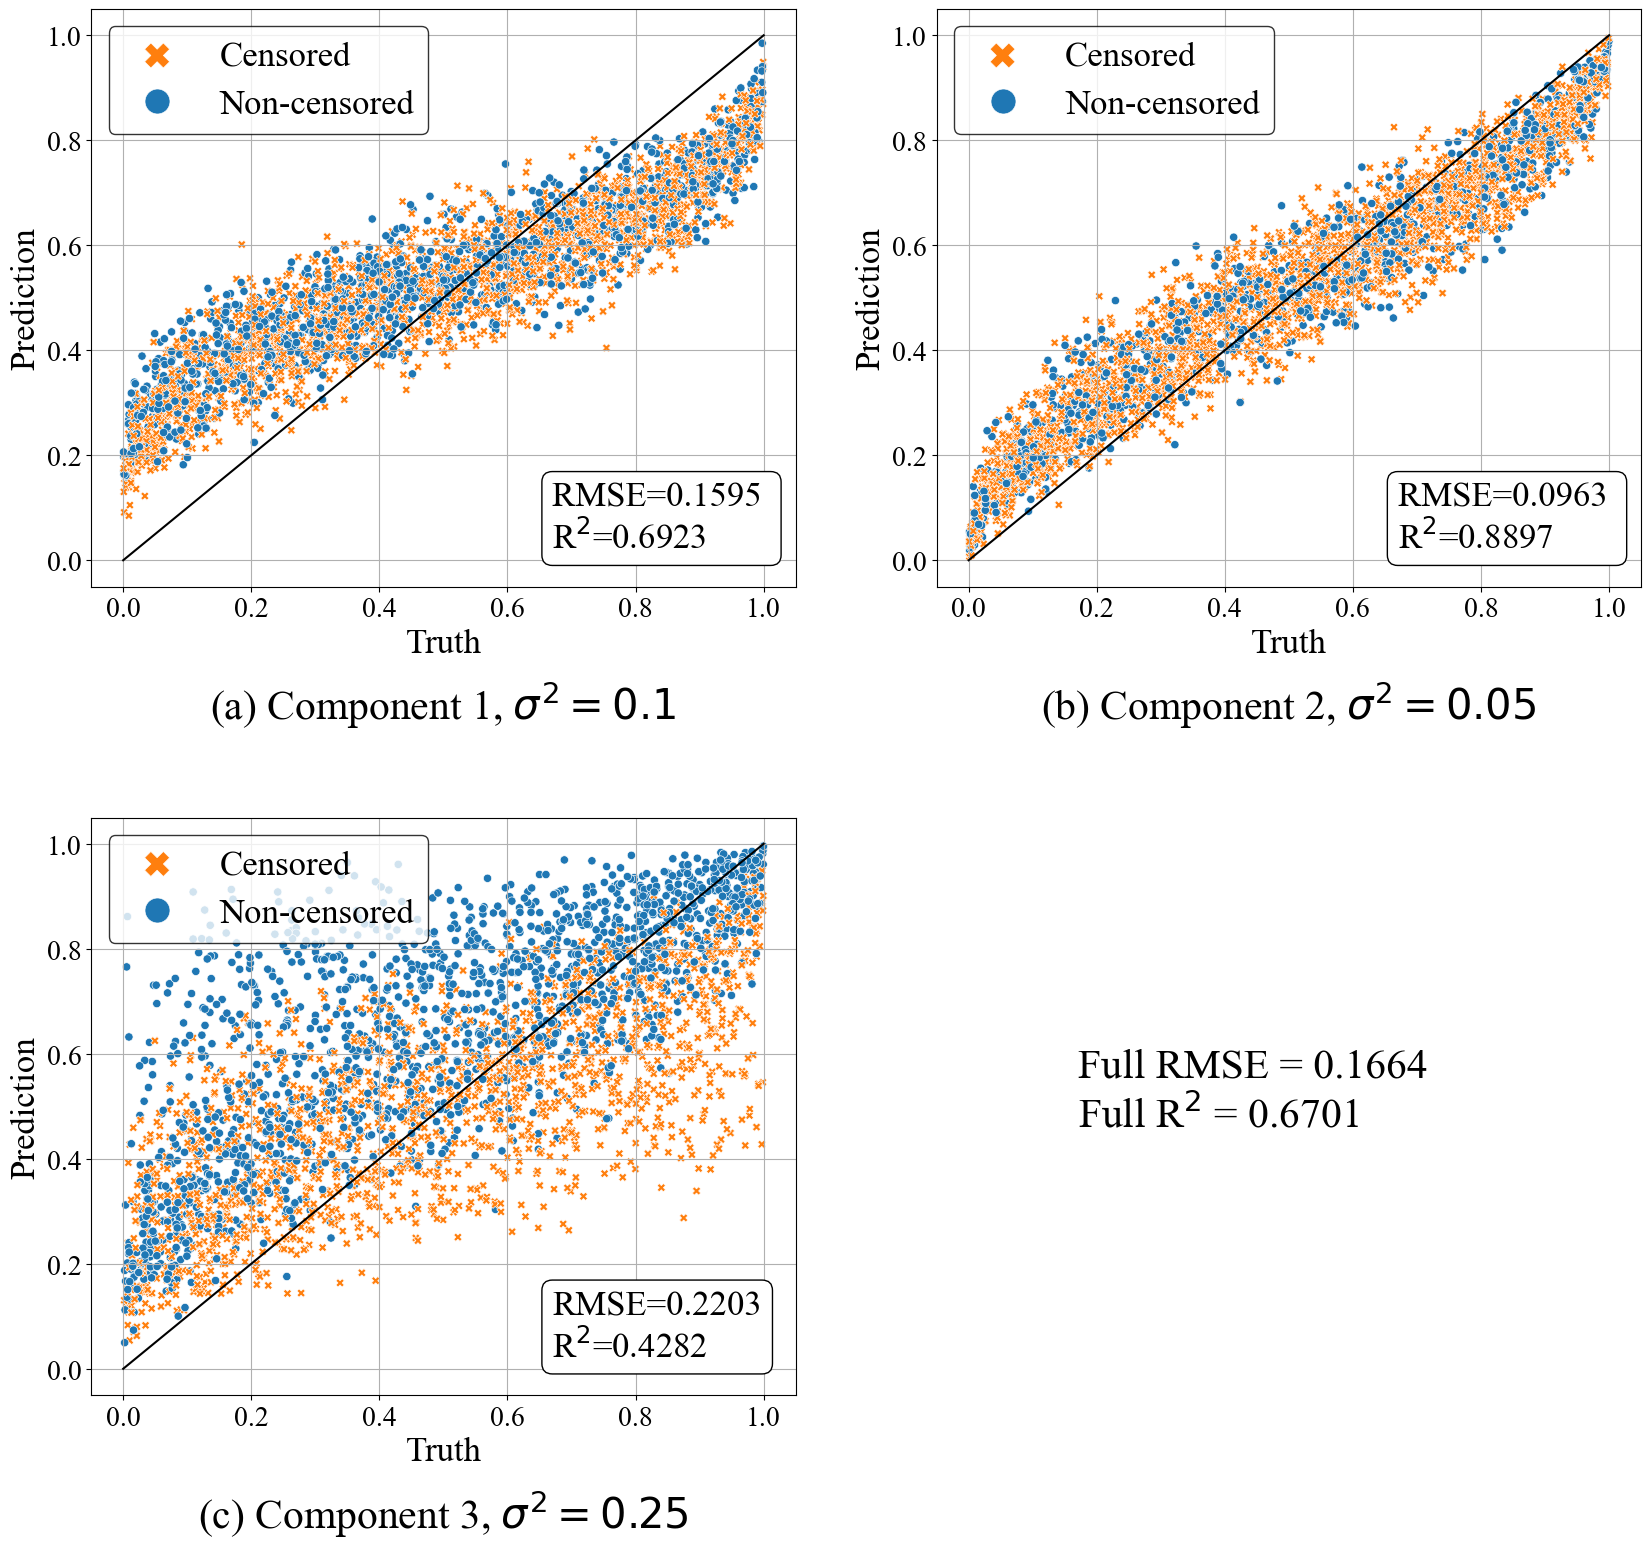

In [31]:
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }

rv = invgamma(a=2, scale=1)
x = np.linspace(0,rv.ppf(0.99), 1000)
pdf = rv.pdf(x)
fig, ax = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20,18))
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.4)

sns.scatterplot(SURV_plot[SURV_plot['z_y'] == 1], x='True_surv', y='Pred_surv', hue='c_y', style='c_y', ax=ax[0,0])
sns.lineplot(x=[0,1], y=[0,1], color='black', ax=ax[0,0])
error = abs(SURV_plot[SURV_plot['z_y'] == 1]['True_surv'] - SURV_plot[SURV_plot['z_y'] == 1]['Pred_surv'])
MSE = round((sum(error**2)/error.shape[0])**0.5, 4)
# MSE = round(np.median(error), 4)
font_tex = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 25,
        }
ax[0,0].legend(['Censored', 'Non-censored'], fontsize=25, edgecolor='black', markerscale=3)
ax[0,0].set_xlabel('Truth', fontsize=25)
ax[0,0].set_ylabel('Prediction', fontsize=25)
ax[0,0].tick_params(axis="x", labelsize=20)
ax[0,0].tick_params(axis="y", labelsize=20)
ax[0,0].set_title(r'(a) Component 1, $\sigma^2 = 0.1$', y=-0.1, pad=-25, verticalalignment="top", fontdict=font)
ax[0,0].grid()
tex = f'RMSE={MSE} \nR$^2$={R_sq_1}'

ax[0,0].text(0.67, 0.01, tex, va='bottom', fontdict=font_tex, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

print(MSE)

sns.scatterplot(SURV_plot[SURV_plot['z_y'] == 2], x='True_surv', y='Pred_surv', hue='c_y', style='c_y', ax=ax[0,1])
sns.lineplot(x=[0,1], y=[0,1], color='black', ax=ax[0,1])
error = abs(SURV_plot[SURV_plot['z_y'] == 2]['True_surv'] - SURV_plot[SURV_plot['z_y'] == 2]['Pred_surv'])
MSE = round((sum(error**2)/error.shape[0])**0.5, 4)
# MSE = round(np.median(error), 4)
font_tex = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 25,
        }
ax[0,1].legend(['Censored', 'Non-censored'], fontsize=25, edgecolor='black', markerscale=3)
ax[0,1].set_xlabel('Truth', fontsize=25)
ax[0,1].set_ylabel('Prediction', fontsize=25)
ax[0,1].tick_params(axis="x", labelsize=20)
ax[0,1].tick_params(axis="y", labelsize=20)
ax[0,1].set_title(r'(b) Component 2, $\sigma^2 = 0.05$', y=-0.1, pad=-25, verticalalignment="top", fontdict=font)
ax[0,1].grid()
tex = f'RMSE={MSE} \nR$^2$={R_sq_2}'
print(MSE)

ax[0,1].text(0.67, 0.01, tex, va='bottom', fontdict=font_tex, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

sns.scatterplot(SURV_plot[SURV_plot['z_y'] == 3], x='True_surv', y='Pred_surv', hue='c_y', style='c_y', ax=ax[1,0])
sns.lineplot(x=[0,1], y=[0,1], color='black', ax=ax[1,0])
error = abs(SURV_plot[SURV_plot['z_y'] == 3]['True_surv'] - SURV_plot[SURV_plot['z_y'] == 3]['Pred_surv'])
MSE = round((sum(error**2)/error.shape[0])**0.5, 4)
# MSE = round(np.median(error), 4)
font_tex = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 25,
        }
ax[1,0].legend(['Censored', 'Non-censored'], fontsize=25, edgecolor='black', markerscale=3, loc='upper left')
ax[1,0].set_xlabel('Truth', fontsize=25)
ax[1,0].set_ylabel('Prediction', fontsize=25)
ax[1,0].tick_params(axis="x", labelsize=20)
ax[1,0].tick_params(axis="y", labelsize=20)
ax[1,0].set_title(r'(c) Component 3, $\sigma^2 = 0.25$', y=-0.1, pad=-25, verticalalignment="top", fontdict=font)
ax[1,0].grid()
tex = f'RMSE={MSE}\nR$^2$={R_sq_3}'
print(MSE)

ax[1,0].text(0.67, 0.01, tex, va='bottom', fontdict=font_tex, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

font_tex = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }
tex = 'Full RMSE = 0.1664 \nFull R$^2$ = 0.6701'
ax[1, 1].set_axis_off()
ax[1, 1].text(0.2, 0.45, tex, va='bottom', fontdict=font_tex)
plt.show()

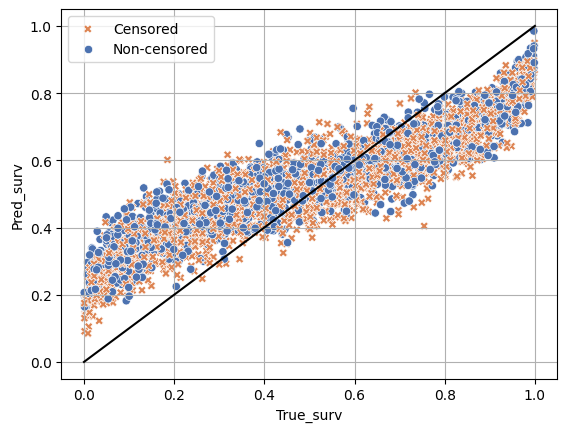

0.13565

In [363]:

sns.scatterplot(SURV_plot[SURV_plot['z_y'] == 1], x='True_surv', y='Pred_surv', hue='c_y', style='c_y', palette='deep')
sns.lineplot(x=[0,1], y=[0,1], color='black')
plt.legend(['Censored', 'Non-censored'])
plt.grid()
error = abs(SURV_plot[SURV_plot['z_y'] == 1]['True_surv'] - SURV_plot[SURV_plot['z_y'] == 1]['Pred_surv'])
MSE = np.median(round(error, 4))
plt.show()
MSE

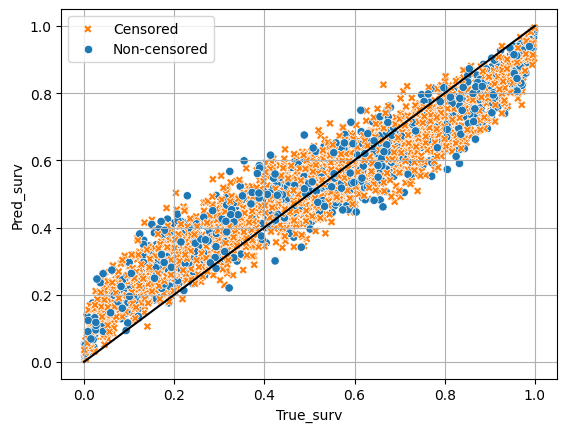

0.074

In [ ]:
sns.scatterplot(SURV_plot[SURV_plot['z_y'] == 2], x='True_surv', y='Pred_surv', hue='c_y', style='c_y')
sns.lineplot(x=[0,1], y=[0,1], color='black')
plt.legend(['Censored', 'Non-censored'])
plt.grid()
error = abs(SURV_plot[SURV_plot['z_y'] == 2]['True_surv'] - SURV_plot[SURV_plot['z_y'] == 2]['Pred_surv'])
MSE = np.median(round(error, 4))
plt.show()
MSE

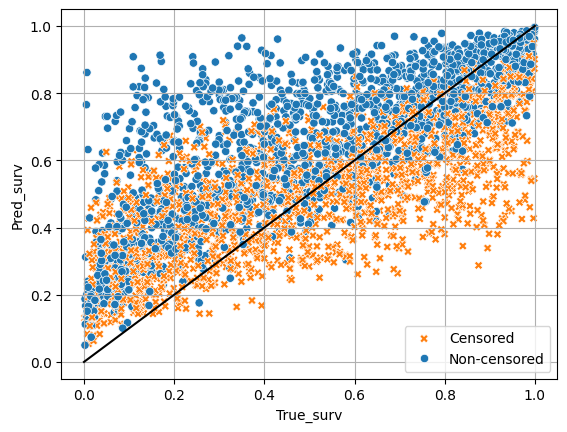

0.142

In [ ]:
sns.scatterplot(SURV_plot[SURV_plot['z_y'] == 3], x='True_surv', y='Pred_surv', hue='c_y', style='c_y')
sns.lineplot(x=[0,1], y=[0,1], color='black')
plt.legend(['Censored', 'Non-censored'])
plt.grid()
error = abs(SURV_plot[SURV_plot['z_y'] == 3]['True_surv'] - SURV_plot[SURV_plot['z_y'] == 3]['Pred_surv'])
MSE = np.median(round(error, 4))
plt.show()
MSE